# Explaining Loan Default: A Data Visualization Approach
## by Lawrence Agyepong

## Investigation Overview

I present the key findings from the exploratory data visualization on the factors that explain loan defaults. I investigated the relationship between loan default and the following variables: Employment Status, Income, Borrower Rate, Prosper Score, Credit Score, and Debt to Income ratio.


## Dataset Overview

The objective of this project is to employ exploratory data visualization techniques to examine the factors that predict loan default. I use loan data from Prosper Marketplace containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After preliminary wrangling, the data was reduced to 42,452 rows and 10 columns. 


In [1]:
# import all packages and set plots to be embedded inline
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Specify font of plots
font = {'size'   : 18}

matplotlib.rc('font', **font)

# suppress warnings from final output
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('clean_loans.csv')

In [3]:
# Convert ordinal columns
# convert IncomeRange,  ProsperScore,  into ordered categorical types
ordinal_var_dict = {
    'IncomeRange': [
        'Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
        '$75,000-99,999', '$100,000+', 'Not displayed'
    ],
    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'debt_ratio': [
        '0 to 13%', '13+ to 20%', '20+ to 30%', '30+ to 100%', '100+ to 1000%',
        '1000% plus'
    ]
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(
        ordered=True, categories=ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [4]:
# A function that creates relative frequency plot
# Plot the distribution on a barplot
def Freq_plot(x, data=loans, rotate_xlabel=0):
    '''Create Relative Frequeny Barplot
    Parameters
    -----------
    x: str, column
    data: dataframe
     rotate_xlabel: int, angle of rotation of x-axis ticks'''
    
    # Create a dataframe of relative frequency
    rel_freq = 100 * (data.groupby(x).size() /
                      data.shape[0]).sort_values(ascending=False)
    rel_freq = rel_freq.reset_index(name='Relative Frequency')
    # Plot the data
    plt.figure(figsize=[15, 10])
    sb.barplot(data=rel_freq, x=x, y='Relative Frequency', color='black')
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation=rotate_xlabel)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42452 entries, 0 to 42451
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ListingKey             42452 non-null  object  
 1   BorrowerRate           42452 non-null  float64 
 2   ProsperScore           20637 non-null  category
 3   EmploymentStatus       41057 non-null  object  
 4   CreditScoreRangeLower  42452 non-null  float64 
 5   CreditScoreRangeUpper  42452 non-null  float64 
 6   AmountDelinquent       36832 non-null  float64 
 7   DebtToIncomeRatio      39513 non-null  float64 
 8   IncomeRange            42031 non-null  category
 9   LoanStatus             42452 non-null  object  
 10  default                42452 non-null  int64   
 11  debt_ratio             39499 non-null  category
dtypes: category(3), float64(5), int64(1), object(3)
memory usage: 3.0+ MB


## Distribution of Loan Status

Out of the 42,452 loans, about 11% corresponding to 4,833 have defaulted and the reminder has been completed.

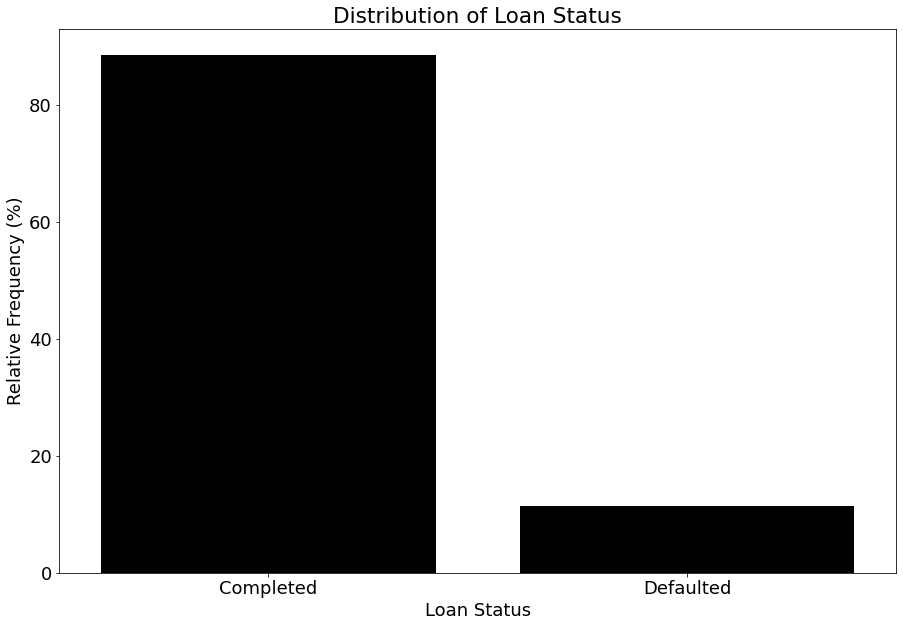

In [6]:
# Distribution of Loan Status
Freq_plot('LoanStatus')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status');

## Loan Default vs. Income

Generally, we observe that higher income levels correspond to lower loan default rates. From \\$1-24,999 to $100,000+, loan default rate drops from 10.3% to 6.33%. 

An interesting observation is that the default rate among the unemployed is lower than that of the 3 income groups between \\$1-24,999 and $50,000-74,999. Also, the Default rate is highest among clients whose income levels are not displayed. 

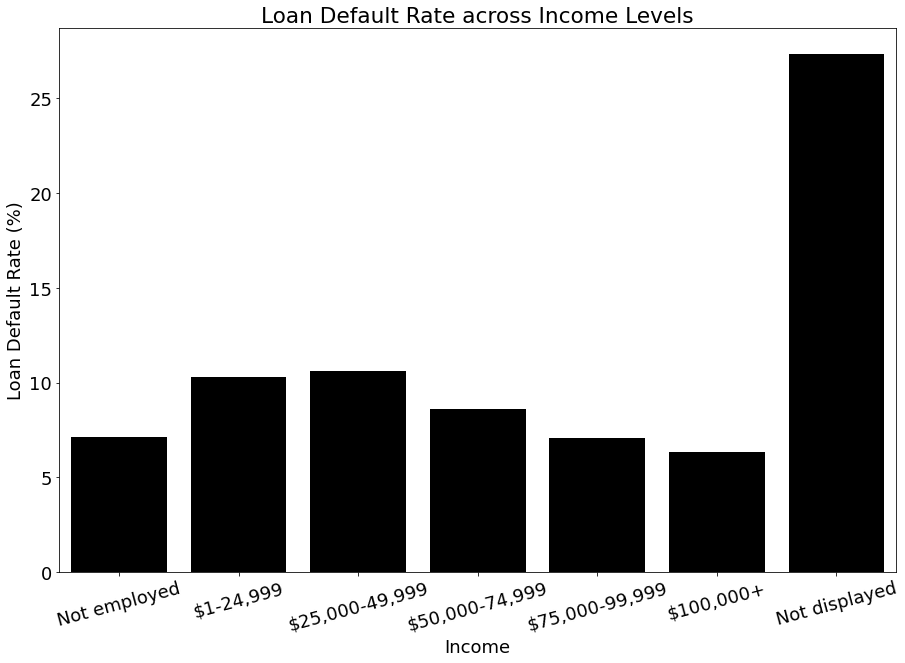

In [7]:
# Barplot of Loan Status againt Income
income_vs_default = loans.groupby('IncomeRange')['default'].mean() * 100
income_vs_default = income_vs_default.reset_index(name='default')

plt.figure(figsize=[15, 10])
sb.barplot(data=income_vs_default,
           x='IncomeRange',
           y='default',
           color='black',
           ci=None)
plt.ylabel('Loan Default Rate (%)')
plt.xlabel('Income')
plt.title('Loan Default Rate across Income Levels')
plt.xticks(rotation = 15);

## Loan Default vs. Prosper Score

There is an inverse relationship between loan default rate and Prosper Score such that, higher Prosper Scores correspond to lower levels of default rate. Except at Score 5 which has a higher default rate than its preceding level (i.e., Score 4), the default rate decreased consistently at high levels of Prosper Score. For example, the default rate dropped from about 9.8% at Score 1 to 1.25% at Score 10. 

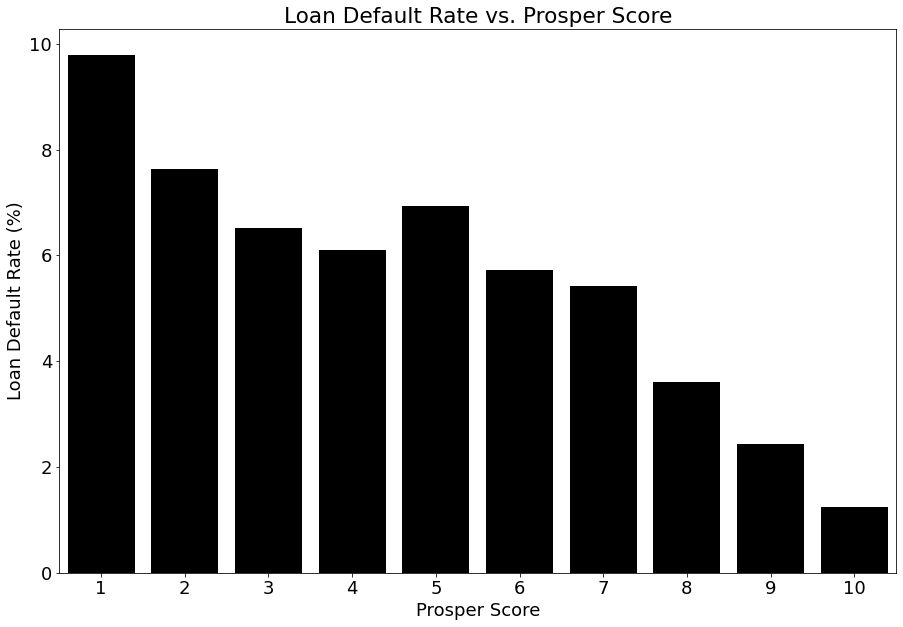

In [8]:
# Proper Score againt Default rate
prosper_default = loans.groupby('ProsperScore')['default'].mean() * 100
prosper_default = prosper_default.reset_index(name='default')

plt.figure(figsize=[15, 10])
sb.barplot(data=prosper_default,
           x='ProsperScore',
           y='default',
           color='black',
           ci=None)
plt.ylabel('Loan Default Rate (%)')
plt.xlabel('Prosper Score')
plt.title('Loan Default Rate vs. Prosper Score');

## Loan Default vs. Debt Ratio

The loan default rate has a positive relationship with the debt ratio. That is, the default rate is high among clients with high debt-to-income ratios. From the analysis, we found that the default rate almost tripled from 9.4% for clients with low debt ratios (0-13%) to 25.3% for those with high debt ratios (1000% plus). 

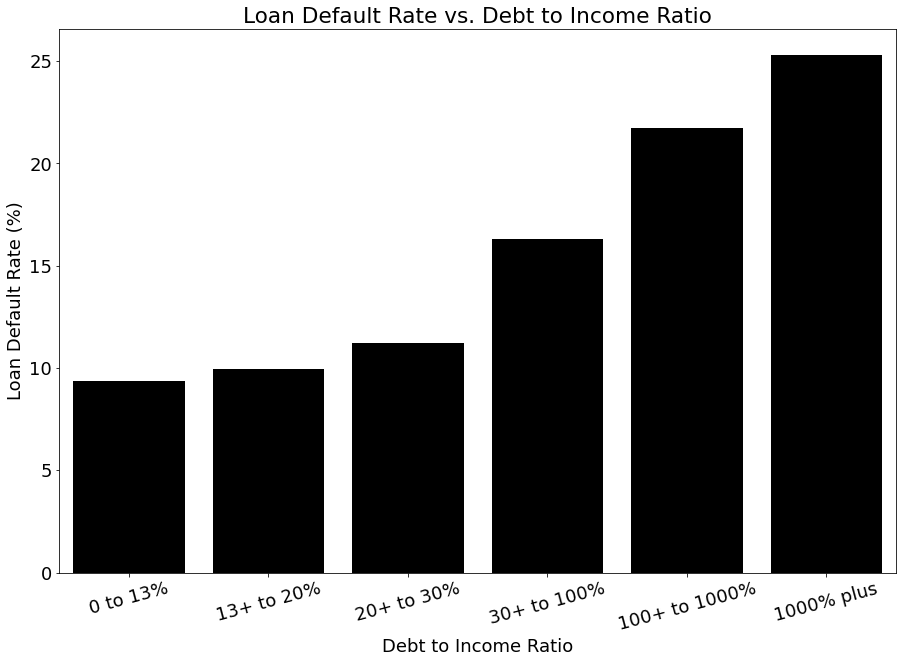

In [9]:
# Proper Score againt Default rate
debt_vs_default = loans.groupby('debt_ratio')['default'].mean() * 100
debt_vs_default = debt_vs_default.reset_index(name='default')

plt.figure(figsize=[15, 10])
sb.barplot(data=debt_vs_default,
           x='debt_ratio',
           y='default',
           color='black',
           ci=None)
plt.ylabel('Loan Default Rate (%)')
plt.xlabel('Debt to Income Ratio')
plt.title('Loan Default Rate vs. Debt to Income Ratio')
plt.xticks(rotation = 15);

## Loan Default vs. Borrower Rate

The analysis reveals that, on average, the borrower rate is higher among clients who defaulted compared to those who completed the loan. The median borrower rate for defaulters is about 22.9% and that of those who completed is 17.5%. This suggests a positive relationship between loan default rates and borrower rates. 

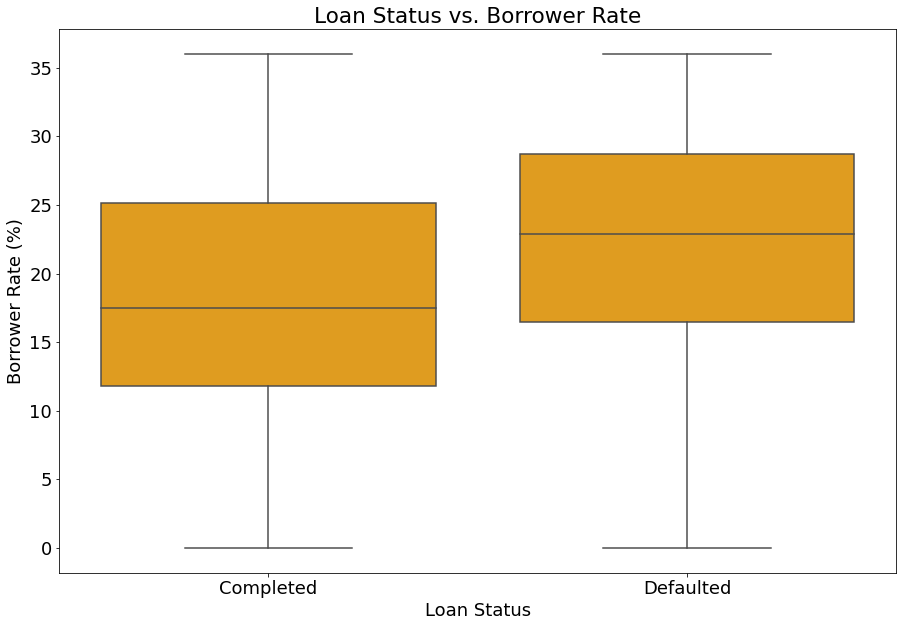

In [10]:
# Relationship between default rates and borrower rate
loans.BorrowerRate = loans.BorrowerRate * 100
plt.figure(figsize=[15, 10])
sb.boxplot(data=loans, x='LoanStatus', y='BorrowerRate', color='orange')
plt.title('Loan Status vs. Borrower Rate')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate (%)');

## Loan Default vs. Credit Score

On average, Credit Score is lower among clients that defaulted compared to those that completed their loans. Defaulters have a median Credit Score of about 640 compared to 680 for those who completed. This suggests that the loan default rate is negatively related to Credit Score.

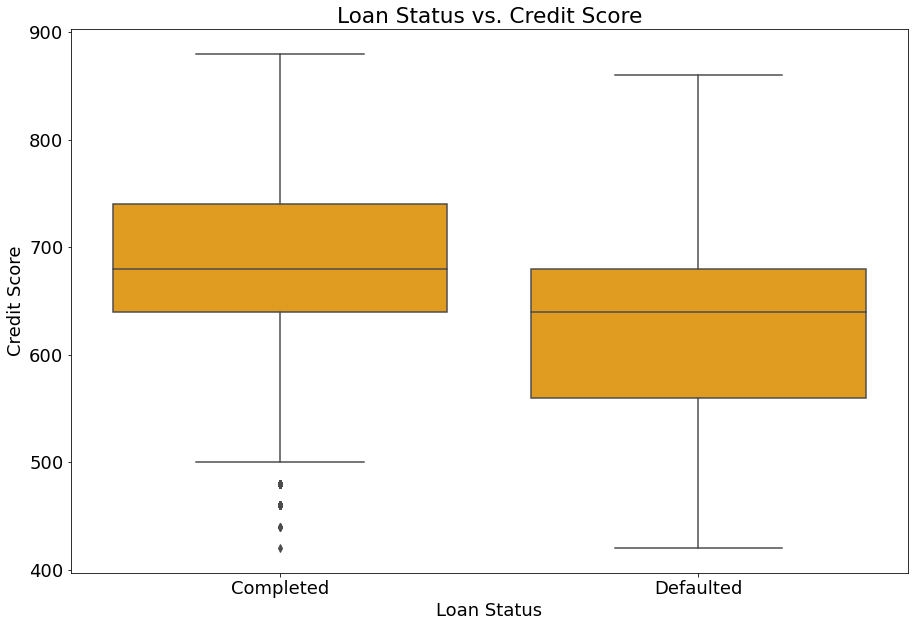

In [11]:
# Boxplot of Loan Status against Credit Score Range Lower
plt.figure(figsize=[15, 10])
sb.boxplot(data=loans,
           x='LoanStatus',
           y='CreditScoreRangeLower',
           color='orange')
plt.title('Loan Status vs. Credit Score')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score');

## Loan Status and Borrower Rate by Employment Status

Generally, we observe that the borrower rate for clients who defaulted is higher than those who completed the loan. On average, clients in the "Other" employment group have the highest borrower rate. In contrast, those in the "Retired" group have the least borrower rate. Furthermore, notice that the difference in borrower rate between clients that defaulted and those who completed is greatest among clients whose employment status is Not available (8%) and smallest for the Self-employed (0.26%).

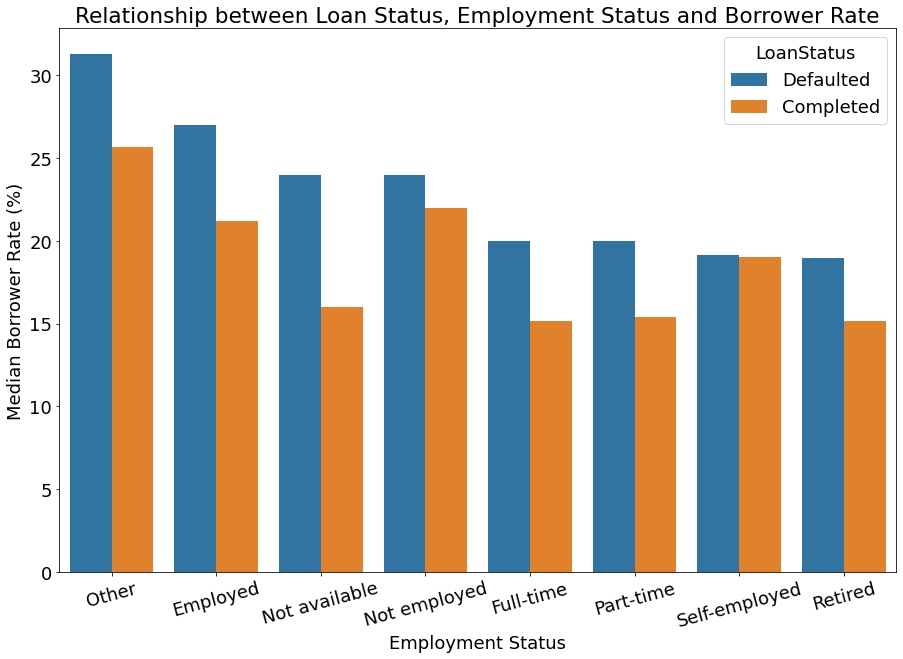

In [12]:
# Visualizing the relationship between employment status, loan status and borrower rate
loan_emp_bor = loans.groupby(
    ['EmploymentStatus',
     'LoanStatus'])['BorrowerRate'].median().sort_values(ascending=False)
loan_emp_bor = loan_emp_bor.reset_index(name='Median Borrower Rate')

plt.figure(figsize=[15, 10])
sb.barplot(data=loan_emp_bor,
           x='EmploymentStatus',
           y='Median Borrower Rate',
           hue='LoanStatus')
plt.title(
    'Relationship between Loan Status, Employment Status and Borrower Rate')
plt.ylabel('Median Borrower Rate (%)')
plt.xlabel('Employment Status')
plt.xticks(rotation = 15);

## Loan Status and Debt Ratio by Income 

On average, for clients whose income is displayed, the debt ratio is higher for clients that defaulted compared to those that completed the loan. Also, the difference in debt ratio between those that defaulted and those that completed is largest among clients who are not employed. For clients whose income level is not displayed, the debt ratio is similar for both loan defaulters and "completers".

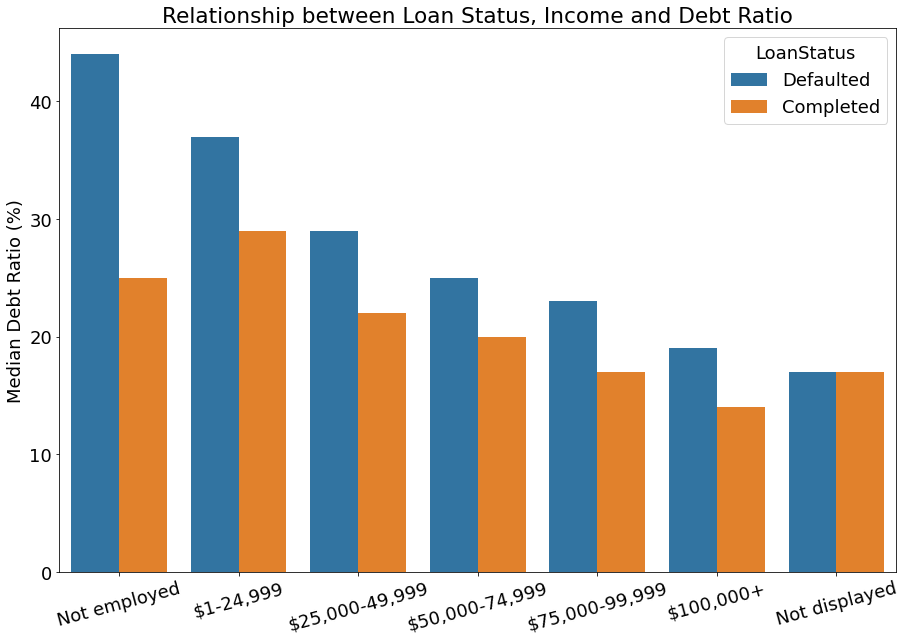

In [13]:
# Visualizing the relationship between loan Status, Income and debt ratio
loan_income_debt = loans.groupby([
    'IncomeRange', 'LoanStatus'
])['DebtToIncomeRatio'].median().sort_values(ascending=False) * 100
loan_income_debt = loan_income_debt.reset_index(name='Median Debt Ratio')
# Exclude $0 group
loan_income_debt = loan_income_debt[loan_income_debt.IncomeRange != '$0']

plt.figure(figsize=[15, 10])
sb.barplot(data=loan_income_debt,
           x='IncomeRange',
           y='Median Debt Ratio',
           hue='LoanStatus')
plt.title('Relationship between Loan Status, Income and Debt Ratio')
plt.ylabel('Median Debt Ratio (%)')
plt.xlabel('')
plt.xticks(rotation = 15);

## Summary of Key Findings 

The key findings are outlined as follows:

- High-income levels correspond to lower loan default rates. 
- High Prosper Scores correspond to lower levels of loan default rates.
- Default rate is high among clients with high debt-to-income ratios.
- On average, the borrower rate (interest rate) is higher among clients who defaulted compared to those who completed the loan. 
- On average, Credit Score is lower among clients that defaulted compared to those that completed their loans.
- The borrower rate for clients who defaulted is higher than for those who completed the loan.
- On average, for clients whose income is displayed, the debt ratio is higher for clients that defaulted compared to those that completed the loan.

In [14]:
!jupyter nbconvert "C:\Users\LENOVO\Desktop\ALX Data Analytics\Data Visualization\Project 3\project-template\Project Template\Explaining Loan Default 2.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook C:\Users\LENOVO\Desktop\ALX Data Analytics\Data Visualization\Project 3\project-template\Project Template\Explaining Loan Default 2.ipynb to slides
[NbConvertApp] Writing 861644 bytes to C:\Users\LENOVO\Desktop\ALX Data Analytics\Data Visualization\Project 3\project-template\Project Template\Explaining Loan Default 2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconverta